<a href="https://colab.research.google.com/github/Shimochi-Rikuto/git-practice/blob/master/Imageprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from keras.datasets import fashion_mnist
#学習データとテストデータをKerasが用意しているFashion-MNISTデータ・セットから読み込む
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [ ]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

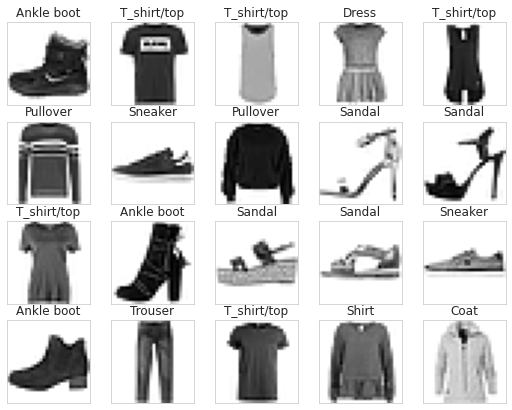

In [ ]:
plt.figure(figsize=(9, 7))
for i in range(20):
  plt.subplot(4, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i].reshape((28,28)), cmap=plt.cm.binary)
  label_index = int(y_train[i])
  plt.title(class_names[label_index])
plt.show()

In [ ]:
X0=X_train[0]
X0_square=X0.reshape(28,28)
df=pd.DataFrame(X0_square)
df.to_csv("employee.csv")

Text(0.5, 1.0, 'Ankle boot')

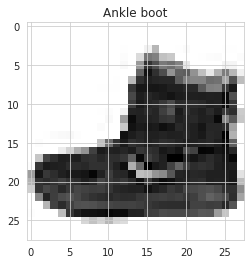

In [ ]:
plt.imshow(X0_square , cmap = plt.cm.binary) 
label_index = y_train[0]
plt.title(f"{class_names[label_index]}")

Text(0.5, 1.0, 'test data')

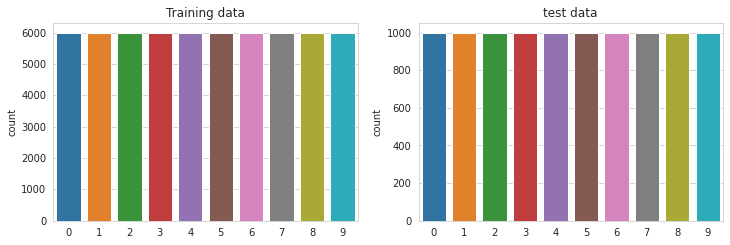

In [ ]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.countplot(y_train)
plt.title('Training data')

plt.subplot(2,2,2)
sns.countplot(y_test)
plt.title('test data')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train, y_train, test_size=0.2, random_state=0)

In [ ]:
print("X_train.shape = {}".format(X_train.shape))
print("y_train.shape = {}".format(y_train.shape))
print("X_valid.shape = {}".format(X_valid.shape))
print("y_valid.shape = {}".format(y_valid.shape))
print("X_test.shape = {}".format(X_test.shape))
print("y_test.shape = {}".format(y_test.shape))

X_train.shape = (48000, 28, 28)
y_train.shape = (48000,)
X_valid.shape = (12000, 28, 28)
y_valid.shape = (12000,)
X_test.shape = (10000, 28, 28)
y_test.shape = (10000,)


In [ ]:
# 28x28x1のサイズへ変換し、数値を０～１に変換するために、255で割る
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)/255.
X_valid = X_valid.reshape(X_valid.shape[0], 28, 28, 1)/255.
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)/255.

In [ ]:
print("X_train.shape = {}".format(X_train.shape))
print("y_train.shape = {}".format(y_train.shape))
print("X_valid.shape = {}".format(X_valid.shape))
print("y_valid.shape = {}".format(y_valid.shape))
print("X_test.shape = {}".format(X_test.shape))
print("y_test.shape = {}".format(y_test.shape))

X_train.shape = (48000, 28, 28, 1)
y_train.shape = (48000,)
X_valid.shape = (12000, 28, 28, 1)
y_valid.shape = (12000,)
X_test.shape = (10000, 28, 28, 1)
y_test.shape = (10000,)


In [ ]:
# 訓練データを確認してみる
for i in range(5):
    print(y_train[i])

7
8
9
0
6


In [ ]:
from keras.utils import np_utils

# ターゲットとなる yをダミー変数（one-hot-encode）にする
y_train = np_utils.to_categorical(y_train, 10)
y_valid = np_utils.to_categorical(y_valid, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [ ]:
# ダミー変数化した訓練データを確認してみる
for i in range(5):
    print(y_train[i])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
import keras

model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, padding="same", activation="relu"),
    keras.layers.Conv2D(64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPool2D(), #位置ずれ許容
    keras.layers.Flatten(), #一次元ベクトルに変換
    keras.layers.Dropout(0.25), #全結合層とのつながりを25%無効化
    keras.layers.Dense(128, activation="relu"), #全結合層
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax") #出力10 , 総和が1となる確率
])

model.compile(loss='categorical_crossentropy',
              optimizer='nadam',
              metrics=['accuracy'])

In [ ]:
import time
# モデルの訓練（エポック 10）
model.fit(X_train, y_train,
          epochs=10,
          validation_data=(X_valid,y_valid))

Epoch 1/10
1500/1500 [==============================] - 209s 138ms/step - loss: 0.6390 - accuracy: 0.7793 - val_loss: 0.3297 - val_accuracy: 0.8821
Epoch 2/10
1500/1500 [==============================] - 197s 132ms/step - loss: 0.3979 - accuracy: 0.8673 - val_loss: 0.2795 - val_accuracy: 0.9004
Epoch 3/10
1500/1500 [==============================] - 194s 129ms/step - loss: 0.3372 - accuracy: 0.8851 - val_loss: 0.2473 - val_accuracy: 0.9132
Epoch 4/10
1500/1500 [==============================] - 194s 129ms/step - loss: 0.3013 - accuracy: 0.8966 - val_loss: 0.2367 - val_accuracy: 0.9137
Epoch 5/10
1500/1500 [==============================] - 204s 136ms/step - loss: 0.2793 - accuracy: 0.9050 - val_loss: 0.2364 - val_accuracy: 0.9165
Epoch 6/10
1500/1500 [==============================] - 197s 131ms/step - loss: 0.2553 - accuracy: 0.9120 - val_loss: 0.2183 - val_accuracy: 0.9182
Epoch 7/10
1500/1500 [==============================] - 210s 140ms/step - loss: 0.2415 - accuracy: 0.9180 - val_

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 9s 29ms/step - loss: 0.2451 - accuracy: 0.9222


[0.24513328075408936, 0.9222000241279602]

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)

y_test = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

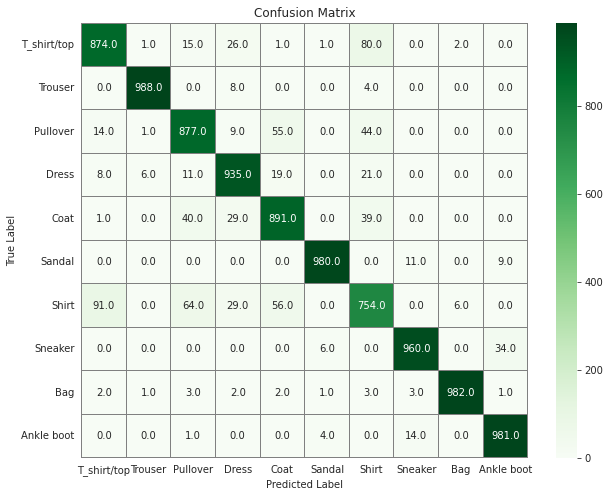

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_mtx = confusion_matrix(y_test, y_pred)

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,
            cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax, 
            yticklabels=class_names, xticklabels=class_names)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

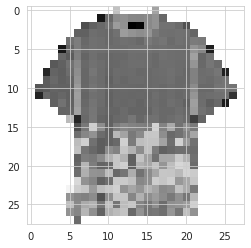

In [ ]:
import cv2
# 画像を読み込んでグレースケールに変換
img = cv2.imread('t_shirt1.jpg' , cv2.IMREAD_GRAYSCALE)
 
# 背景を白
cv2.floodFill(img, None, seedPoint=(4,4), newVal=(0), loDiff=(1), upDiff=(1) )
 
# 画像を28×28に縮小
img = cv2.resize(img,(28,28)) 
plt.imshow(img , cmap = plt.cm.binary)

In [ ]:
# 画像を1枚だけのバッチのメンバーにする
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = model.predict(img)
print(predictions_single)

[[1.00980586e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 9.99999881e-01 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [ ]:
print(class_names[np.argmax(predictions_single[0])])

Shirt
